# INFOTECH ACADEMY MACHINE LEARNING-1 HOMEWORK

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import mplcyberpunk
import pylab
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve


#from sklearn.preprocessing import Imputer

import scipy
from scipy import stats

from tqdm import tqdm

from sklearn.cluster import KMeans
#from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
plt.style.use("cyberpunk")

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    
    

### Load Dataset

In [8]:
df_titanic = pd.read_csv('titanic_dataset.csv')
df_titanic.head()

,Unnamed: 0,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [9]:
df=df_titanic.copy()


## Step 1: Define the Problem

Clearly define the problem you want to solve using the Titanic dataset. For example, you could predict whether a passenger survived or not based on various features.

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

## Step 2: Gather and Explore the Data

Obtain the Titanic dataset from a reliable source, such as Kaggle.
Explore the dataset to understand its structure and variables.
Identify the features that are available and their potential relevance to the problem.

**This data set contains information of 12970 passengers.**

**PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

**HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

**CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

**Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

**Destination** - The planet the passenger will be debarking to.

**Age** - The age of the passenger.

**VIP** - Whether the passenger has paid for special VIP service during the voyage.

**RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

**Name** - The first and last names of the passenger.

**Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

## Step 3: Preprocess the Data

* Handle missing values by imputing or removing them appropriately.
* Detect and handle outliers using techniques such as:
    - **Visualization** : Plot box plots or histograms to identify potential outliers.
    - **Statistical methods**: Calculate z-scores or interquartile ranges to identify and handle outliers.
* Transform categorical variables into numerical representations (e.g., one-hot encoding).
* Normalize or scale numerical features as needed.

In [10]:
unique_series = df.nunique().rename('unique_count')
na_series = df.isna().sum().rename('na_count')
type_series = df.dtypes.rename('type')

print(pd.concat([unique_series, na_series, type_series], axis=1))

              unique_count  na_count     type
Unnamed: 0            8693         0    int64
PassengerId          12970         0   object
HomePlanet               3       288   object
CryoSleep                2       310   object
Cabin                 9825       299   object
Destination              3       274   object
Age                     80       270  float64
VIP                      2       296   object
RoomService           1578       263  float64
FoodCourt             1953       289  float64
ShoppingMall          1367       306  float64
Spa                   1679       284  float64
VRDeck                1642       268  float64
Name                 12629       294   object
Transported              2         0     bool


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,12970.0,3617.887741,2408.607419,0.0,1621.0,3242.0,5449.75,8692.0
Age,12700.0,28.771969,14.387261,0.0,19.0,27.0,38.00,79.0
RoomService,12707.0,222.897852,647.596664,0.0,0.0,0.0,49.00,14327.0
FoodCourt,12681.0,451.961675,1584.370747,0.0,0.0,0.0,77.00,29813.0
ShoppingMall,12664.0,174.906033,590.558690,0.0,0.0,0.0,29.00,23492.0
Spa,12686.0,308.476904,1130.279641,0.0,0.0,0.0,57.00,22408.0
VRDeck,12702.0,306.789482,1180.097223,0.0,0.0,0.0,42.00,24133.0


In [12]:
duplicates = df.duplicated(keep=False)
print(df[duplicates])

Empty DataFrame
Columns: [Unnamed: 0, PassengerId, HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name, Transported]
Index: []


In [13]:
missing_percentage = df.isnull().mean() * 100
# Filter columns with missing values
columns_with_missing_values = missing_percentage[missing_percentage > 0]
# Print the columns with missing values and their percentages
for column, percentage in columns_with_missing_values.items():
    print(f"{column}' : {percentage:.2f}%")

HomePlanet' : 2.22%
CryoSleep' : 2.39%
Cabin' : 2.31%
Destination' : 2.11%
Age' : 2.08%
VIP' : 2.28%
RoomService' : 2.03%
FoodCourt' : 2.23%
ShoppingMall' : 2.36%
Spa' : 2.19%
VRDeck' : 2.07%
Name' : 2.27%


In [14]:
df[["Deck", "Cabin_num", "Side"]] = df["Cabin"].str.split("/", expand=True)

In [15]:
df=df.drop(['Name','PassengerId','Unnamed: 0','Cabin'],axis=1)
df.tail()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
12965,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1496,S
12966,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,False,NaN,NaN,NaN
12967,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,False,D,296,P
12968,Europa,False,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,False,D,297,P
12969,Earth,True,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1498,S


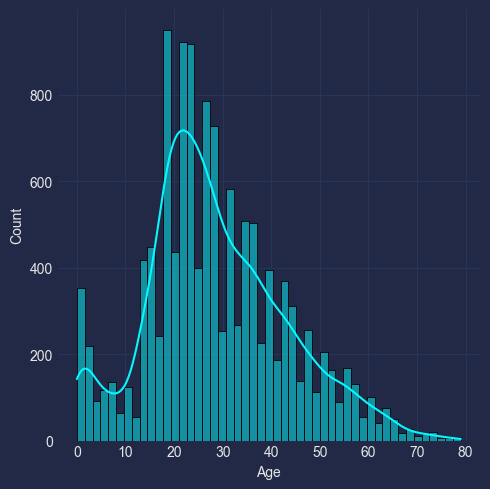

In [16]:
# Examine Age Column Distribution
sns.displot(df["Age"],kde=True)

In [17]:
numerical_data = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_data

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [18]:
categorical_data = df.select_dtypes(include=['object']).columns.tolist()
categorical_data

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Cabin_num', 'Side']

Filling NaN Values in Age Column with Median Age


In [19]:
# Median of Age Column
df["Age"].median()
#Filling NaN Values in Age Column with Median Age
df["Age"] = df["Age"].fillna(df["Age"].median())

In [20]:
#Verifying that NaN Values are Removed
df["Age"].isna().sum()

0

Cleaning VIP Columns

In [21]:
#Counting Maximum Occuring Variable and storing it into max_string_vip Variable
string_counts_vip = df["VIP"].value_counts()
max_string_vip = string_counts_vip.idxmax()
#Filling NaN Values in VIP Column with max_string_vip Value
df["VIP"].fillna(max_string_vip, inplace=True)
#Verifying that NaN Values are Removed
df["VIP"].isna().sum()
#Converting VIP into int DataType
df["VIP"] = df["VIP"].astype(int)

 Cleaning Destination Column

In [22]:

#Counting Maximum Occuring Variable and storing it into max_string_dest Variable
string_counts_dest = df["Destination"].value_counts()
max_string_dest = string_counts_dest.idxmax()
#Filling NaN Values in Destination Column with max_string_dest Value
df["Destination"].fillna(max_string_dest, inplace=True)
#Verifying that NaN Values are Removed
df["Destination"].isna().sum()

0

Cleaning HomePlanet Column

In [23]:
#Counting Maximum Occuring Variable and storing it into max_string_home Variable
string_counts_home = df["HomePlanet"].value_counts()
max_string_home = string_counts_home.idxmax()
#Filling NaN Values in HomePlanet Column with max_string_home Value
df["HomePlanet"].fillna(max_string_home, inplace=True)
#Verifying that NaN Values are Removed
df["HomePlanet"].isna().sum()

0

Cleaning CryoSleep Column


In [24]:
#Counting Maximum Occuring Variable and storing it into max_string_cryo Variable
string_counts_cryo = df["CryoSleep"].value_counts()

max_string_cryo = string_counts_cryo.idxmax()
#Filling NaN Values in CryoSleep Column with max_string_cryo Value
df["CryoSleep"].fillna(max_string_cryo, inplace=True)
#Verifying that NaN Values are Removed
df["CryoSleep"].isna().sum()

0

In [25]:
#Converting CryoSleep into int DataType
df["CryoSleep"] = df["CryoSleep"].astype(int)

Cleaning RoomService, FoodCourt, ShoppingMall, Spa, VRDeck Column

In [26]:
#Dropping Null Values from RoomService, FoodCourt, ShoppingMall, Spa, VRDeck Column
df.dropna(inplace=True)

In [27]:
u_destinations = df["Destination"].unique()
df["Destination"] = df["Destination"].map(dict(zip(u_destinations,list(range(len(u_destinations)))))).astype(int)

In [28]:
df["VIP"] = df["VIP"].astype(int)
df["CryoSleep"] = df["CryoSleep"].astype(int)
df["HomePlanet"] = df["HomePlanet"].map({'Earth':0, 'Europa':1, 'Mars':2}).astype(int)
df["Deck"] = df["Deck"].map({  'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7}).astype(int)
df["Side"] = df["Side"].map({'P':0, 'S':1}).astype(int)
df["Cabin_num"] = df["Cabin_num"].astype(int)

In [29]:
label = "Transported"
df[label] = df[label].astype(int)

In [30]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,1,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
1,0,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,5,0,1
2,1,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0,1
3,1,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,1
4,0,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,5,1,1


In [31]:
df.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Cabin_num       0
Side            0
dtype: int64

In [32]:
df.shape

(11332, 14)

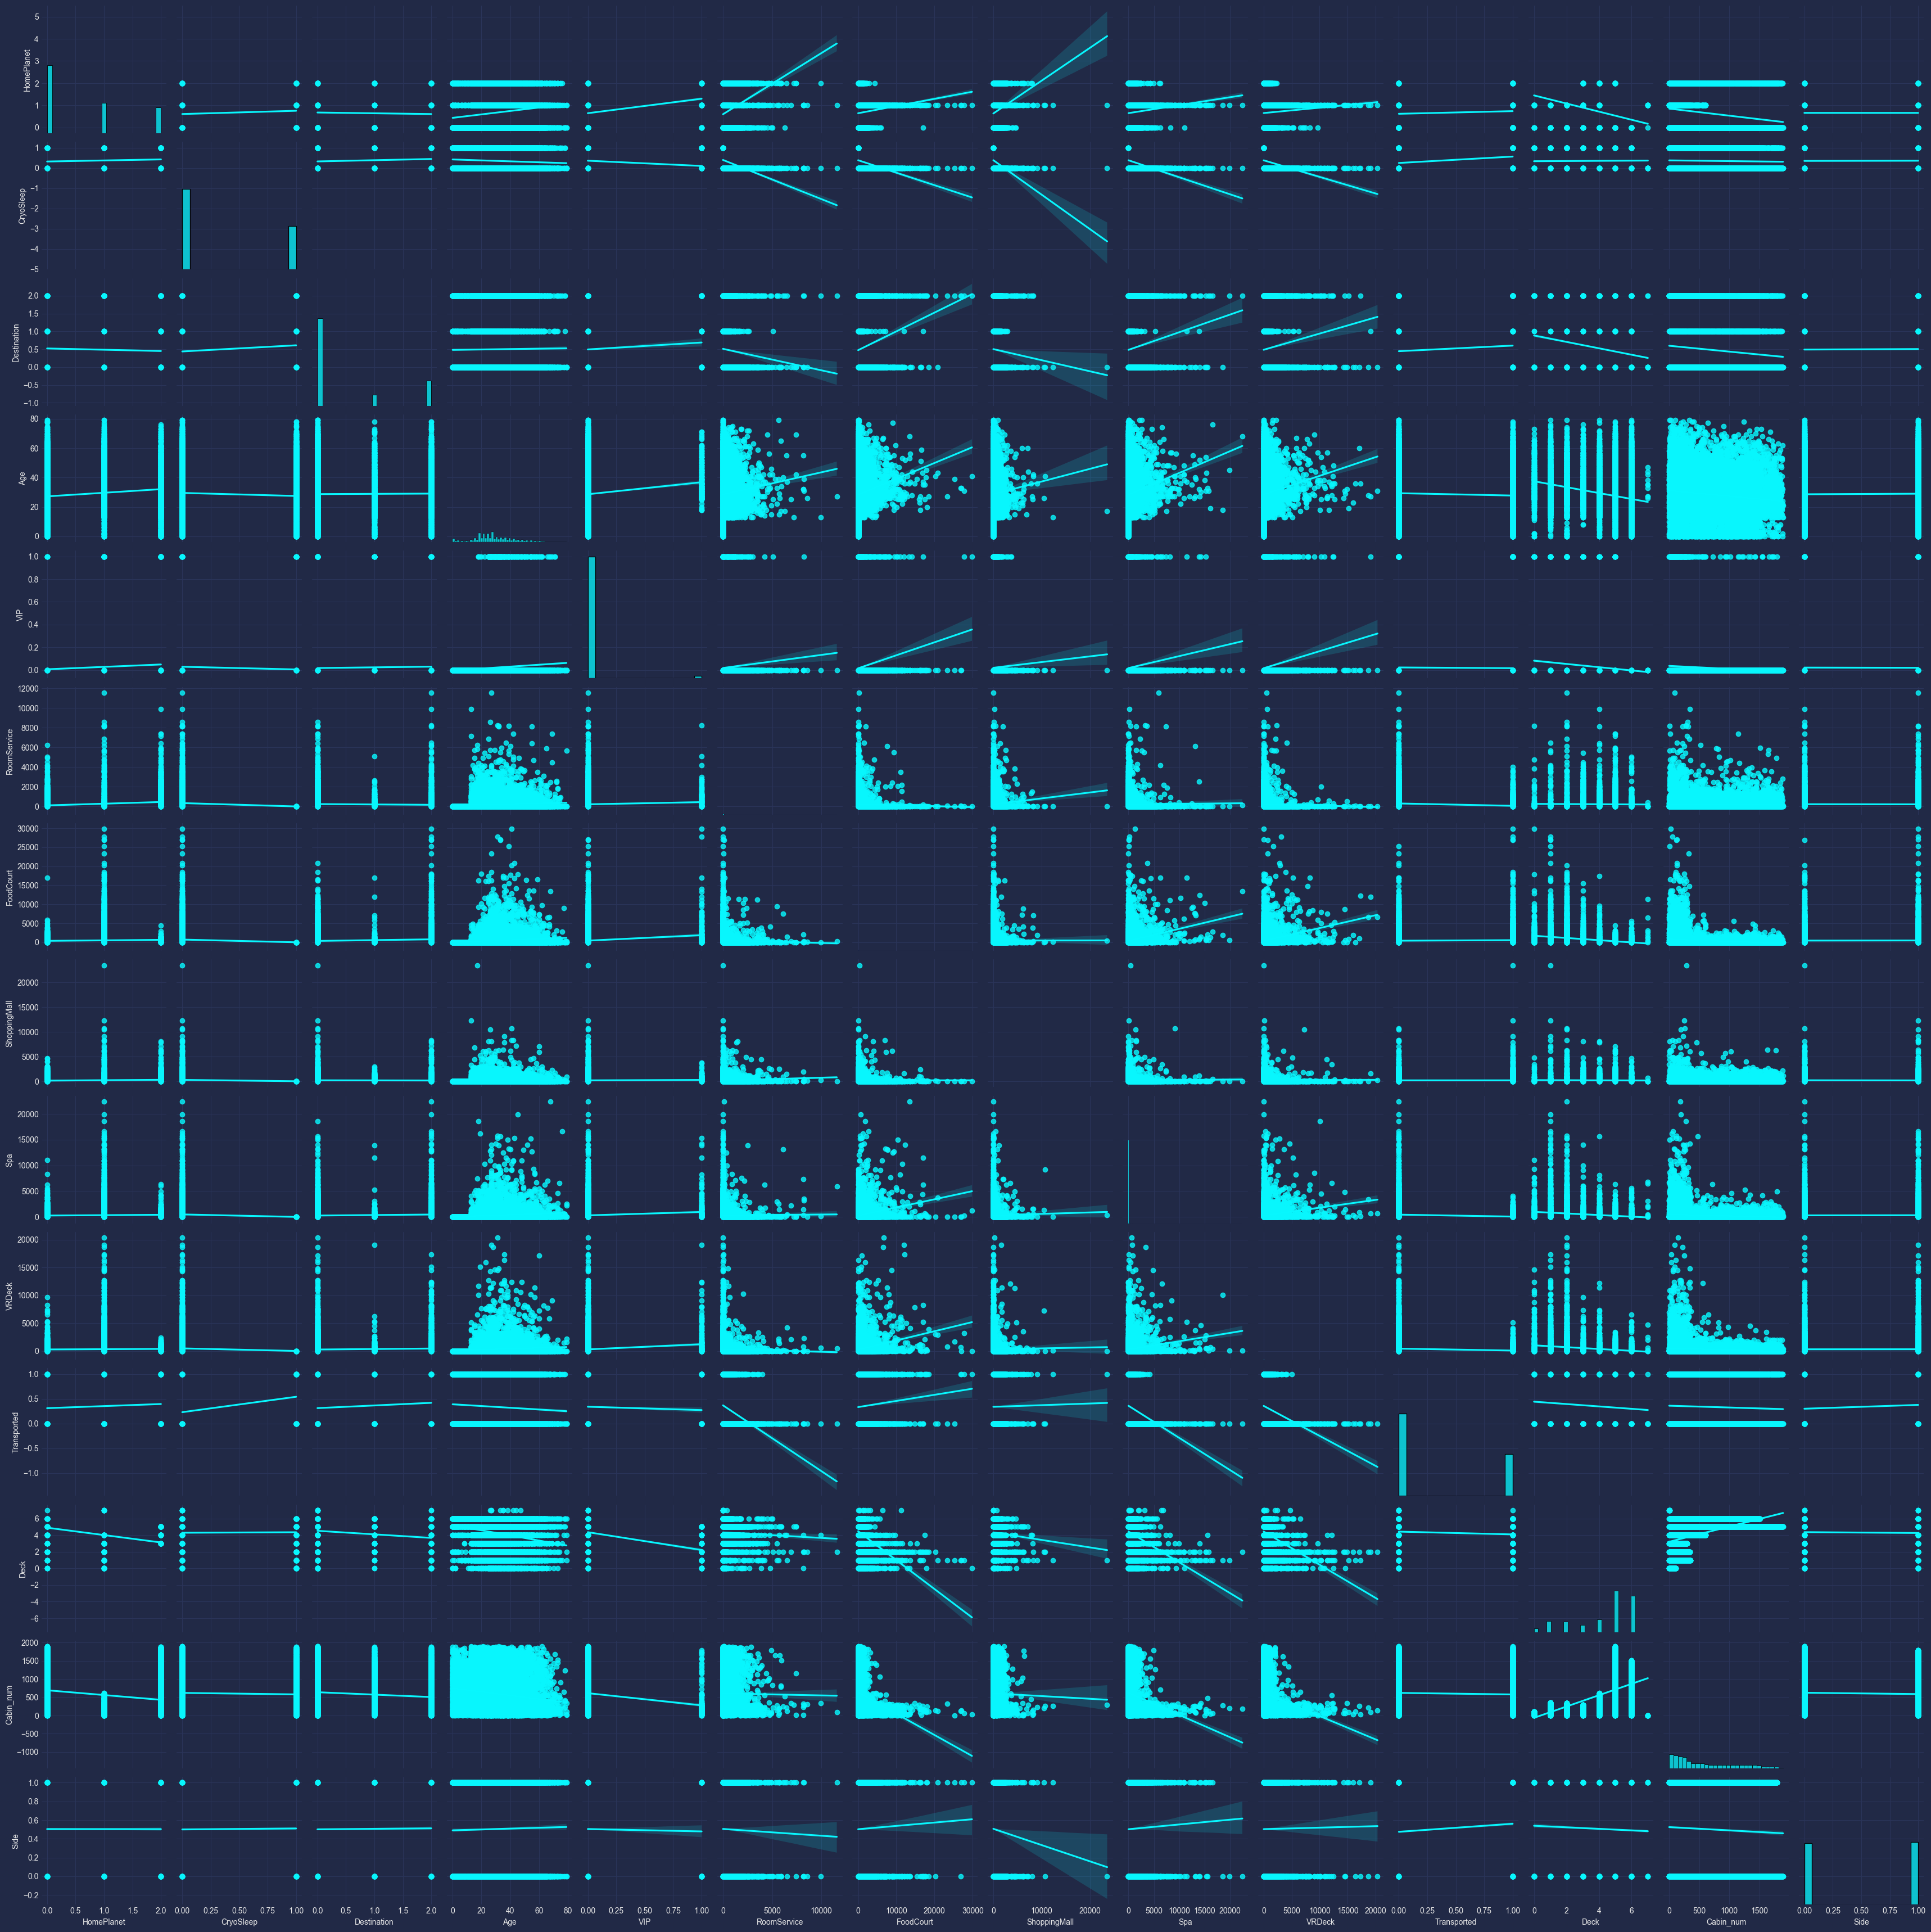

In [33]:
import seaborn as sns
sns.pairplot(df, kind  ="reg")

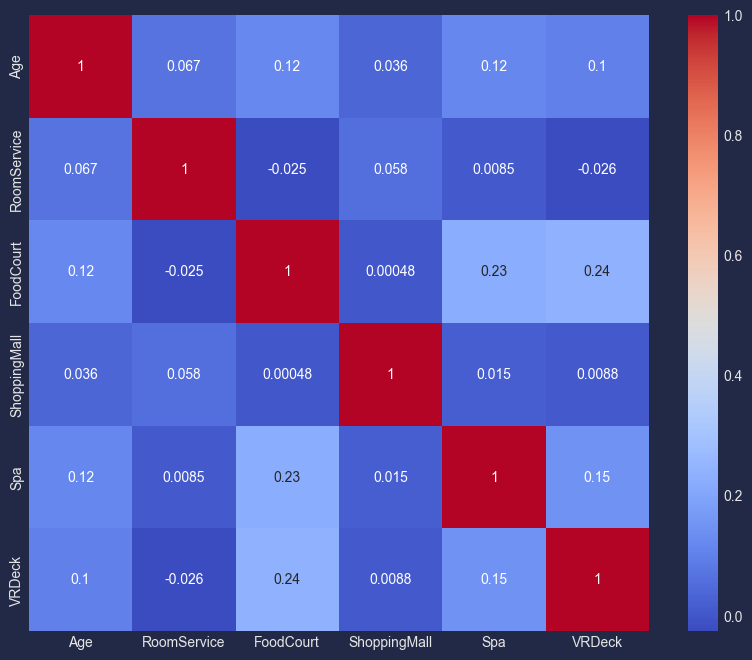

In [34]:

corr_matrix = df[numerical_data].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

<Axes: xlabel='Transported', ylabel='count'>

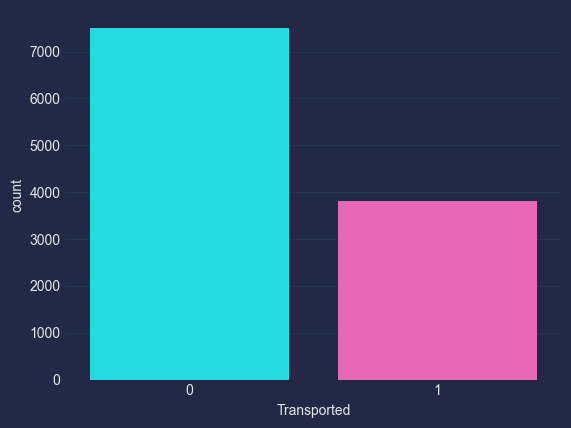

In [35]:

sns.countplot(x="Transported",data=df)

array([[<Axes: title={'center': 'HomePlanet'}>,
        <Axes: title={'center': 'CryoSleep'}>,
        <Axes: title={'center': 'Destination'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'VIP'}>,
        <Axes: title={'center': 'RoomService'}>,
        <Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>,
        <Axes: title={'center': 'Transported'}>,
        <Axes: title={'center': 'Deck'}>],
       [<Axes: title={'center': 'Cabin_num'}>,
        <Axes: title={'center': 'Side'}>, <Axes: >, <Axes: >]],
      dtype=object)

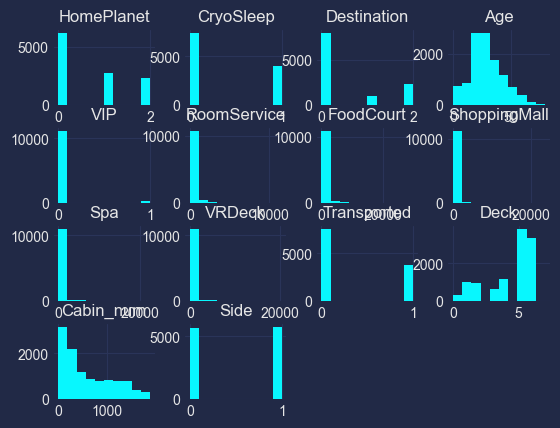

In [36]:
df.hist()

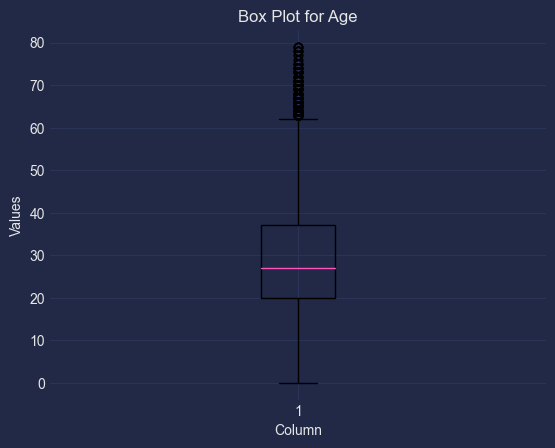

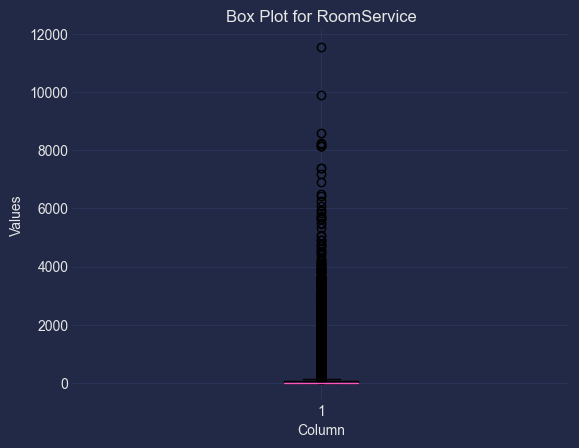

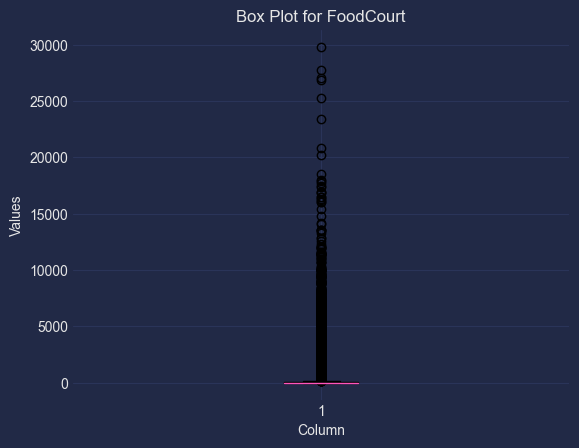

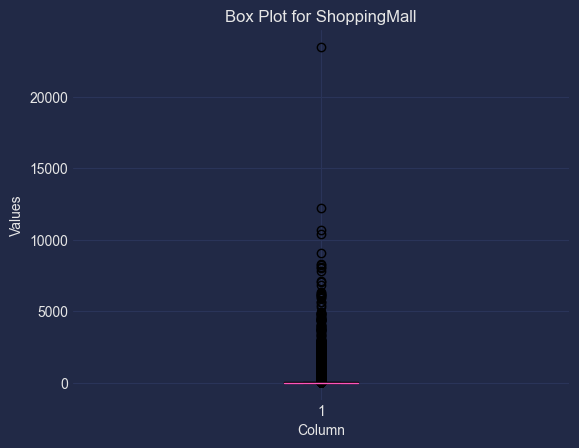

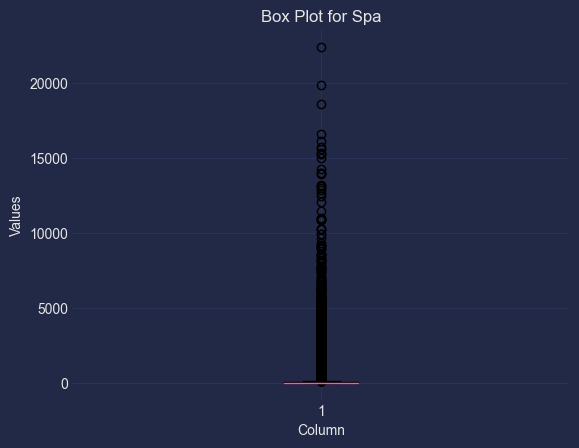

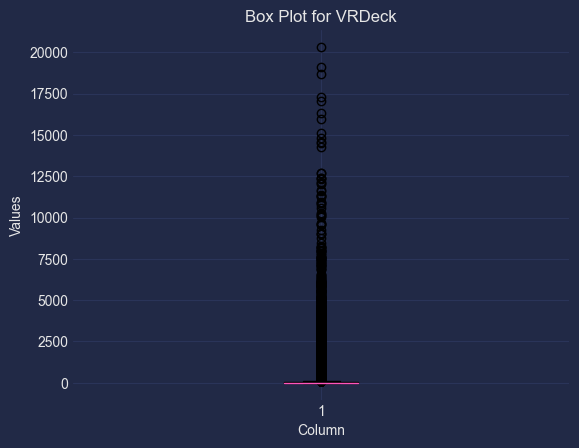

In [550]:

import matplotlib.pyplot as plt
# Create box plots for each numeric column
for column in numerical_data:
    plt.figure()
    plt.boxplot(df[column])
    plt.title(f"Box Plot for {column}")
    plt.xlabel("Column")
    plt.ylabel("Values")
    plt.show()

In [37]:
# Calculate the median of the data
median = np.median(df['RoomService'])

# Set the threshold as a multiple of the interquartile range (IQR)
threshold = 1.5

# Calculate the IQR
q25, q75 = np.percentile(df['RoomService'], [25, 75])
iqr = q75 - q25

# Replace the values outside the threshold with the median
df['RoomService'][(df['RoomService'] < q25 - threshold * iqr) | (df['RoomService'] > q75 + threshold * iqr)] = median

C:\Users\karakurt\AppData\Local\Temp\ipykernel_2372\2093443340.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RoomService'][(df['RoomService'] < q25 - threshold * iqr) | (df['RoomService'] > q75 + threshold * iqr)] = median


In [38]:
# Calculate the mean and standard deviation of the data
mean = np.mean(df['FoodCourt'])
std = np.std(df['FoodCourt'])

# Set the threshold as a multiple of the standard deviation
threshold = 3

# Replace the values outside the threshold with the mean
df['FoodCourt'][np.abs(df['FoodCourt'] - mean) > threshold * std] = mean

C:\Users\karakurt\AppData\Local\Temp\ipykernel_2372\168367201.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FoodCourt'][np.abs(df['FoodCourt'] - mean) > threshold * std] = mean


In [39]:
# Calculate the mean and standard deviation of the data
mean = np.mean(df['ShoppingMall'])
std = np.std(df['ShoppingMall'])

# Set the threshold as a multiple of the standard deviation
threshold = 3

# Replace the values outside the threshold with the mean
df['ShoppingMall'][np.abs(df['ShoppingMall'] - mean) > threshold * std] = mean

C:\Users\karakurt\AppData\Local\Temp\ipykernel_2372\3492854113.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ShoppingMall'][np.abs(df['ShoppingMall'] - mean) > threshold * std] = mean


In [40]:
# Calculate the mean and standard deviation of the data
mean = np.mean(df['Spa'])
std = np.std(df['Spa'])

# Set the threshold as a multiple of the standard deviation
threshold = 3

# Replace the values outside the threshold with the mean
df['Spa'][np.abs(df['Spa'] - mean) > threshold * std] = mean

C:\Users\karakurt\AppData\Local\Temp\ipykernel_2372\2750071461.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Spa'][np.abs(df['Spa'] - mean) > threshold * std] = mean


In [41]:
# Calculate the mean and standard deviation of the data
mean = np.mean(df['VRDeck'])
std = np.std(df['VRDeck'])

# Set the threshold as a multiple of the standard deviation
threshold = 3

# Replace the values outside the threshold with the mean
df['VRDeck'][np.abs(df['VRDeck'] - mean) > threshold * std] = mean

C:\Users\karakurt\AppData\Local\Temp\ipykernel_2372\831285708.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VRDeck'][np.abs(df['VRDeck'] - mean) > threshold * std] = mean


In [42]:
df2 = df.copy()

In [43]:
numerical_data = df2.select_dtypes(include=['int32', 'float64']).columns.tolist()
numerical_data

['HomePlanet',
 'CryoSleep',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Transported',
 'Deck',
 'Cabin_num',
 'Side']

 Outliers Handling with Z-Score

In [44]:
z_scores = pd.DataFrame()
for column in numerical_data:
    z_score = (df2[column] - df2[column].mean()) / df2[column].std()
    z_scores[column] = z_score

# Set the threshold for identifying outliers
z_score_threshold = 3

# Replace the outliers with the mean value of each column
for column in numerical_data:
    df2[column] = np.where(z_scores[column].abs() > z_score_threshold, df2[column].mean(), df2[column])

z_scores

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,0.423892,-0.732743,-0.613828,0.717024,-0.147089,-0.255736,-0.369531,-0.403922,-0.378340,-0.367673,-0.712933,-1.874765,-1.175770,-1.007752
1,-0.824431,-0.732743,-0.613828,-0.336024,-0.147089,6.197814,-0.357601,-0.322009,0.741409,-0.274887,1.402532,0.391411,-1.175770,0.992221
2,0.423892,-0.732743,-0.613828,2.050885,6.797984,2.290160,4.370492,-0.403922,0.259451,-0.264343,-0.712933,-2.441309,-1.175770,0.992221
3,0.423892,-0.732743,-0.613828,0.295805,-0.147089,-0.255736,1.331098,0.811664,6.411540,0.039320,-0.712933,-2.441309,-1.175770,0.992221
4,-0.824431,-0.732743,-0.613828,-0.897650,-0.147089,-0.255736,-0.276745,0.090831,0.774043,-0.363455,1.402532,0.391411,-1.173827,0.992221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12964,-0.824431,-0.732743,-0.613828,0.787228,-0.147089,-0.255736,0.777035,-0.403922,-0.372221,-0.367673,-0.712933,0.391411,2.314270,0.992221
12965,-0.824431,1.364615,-0.613828,0.366008,-0.147089,-0.255736,-0.369531,-0.403922,-0.378340,-0.367673,-0.712933,0.957955,1.731301,0.992221
12967,1.672215,1.364615,1.855867,-0.125414,-0.147089,-0.255736,-0.369531,-0.403922,-0.378340,-0.367673,-0.712933,-0.741677,-0.600574,-1.007752
12968,0.423892,-0.732743,-0.613828,-0.125414,-0.147089,-0.255736,3.182836,-0.403922,-0.378340,0.735214,-0.712933,-0.741677,-0.598631,-1.007752


Plotting the Differences

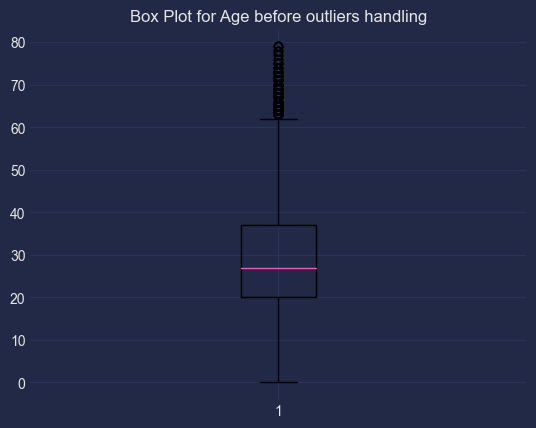

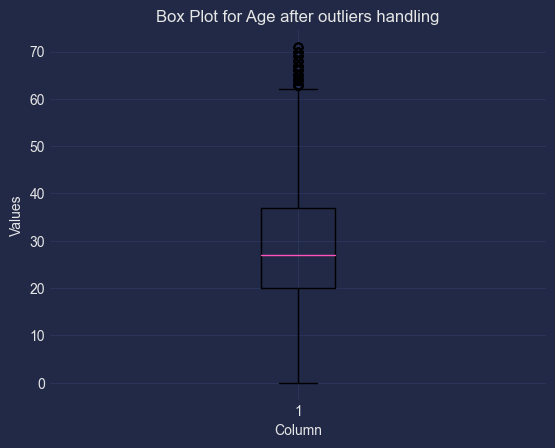

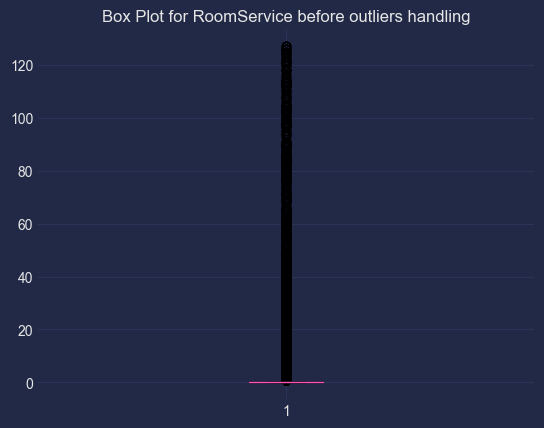

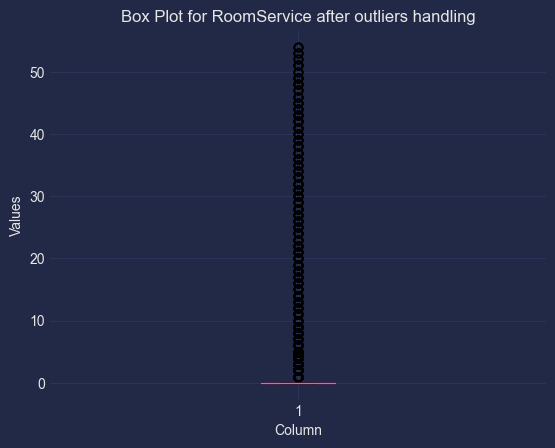

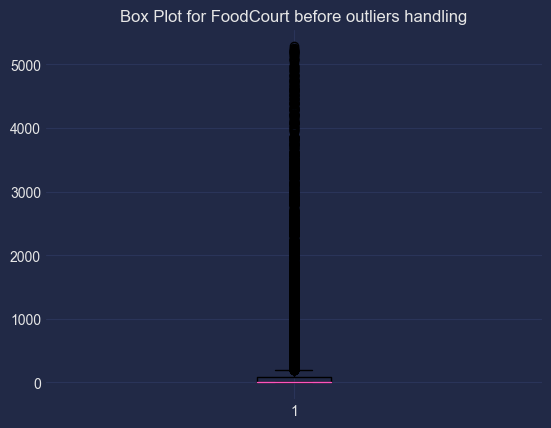

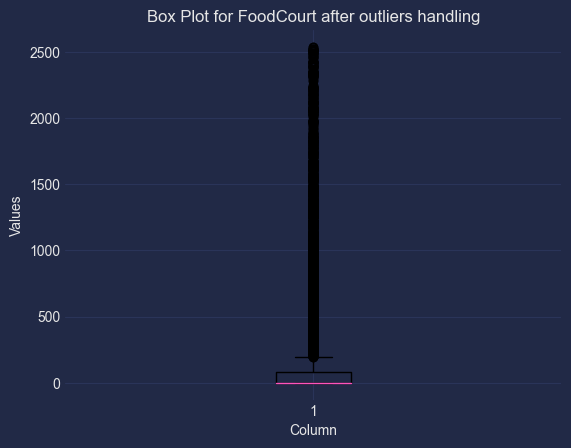

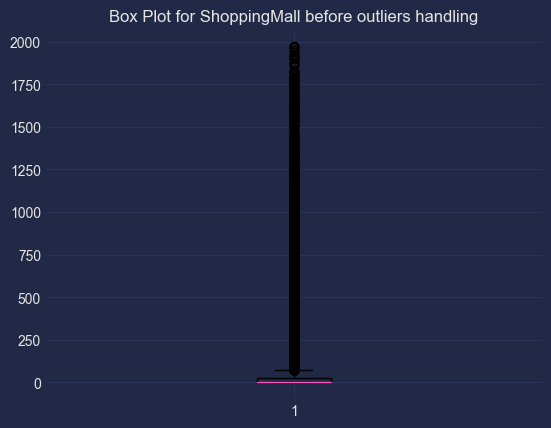

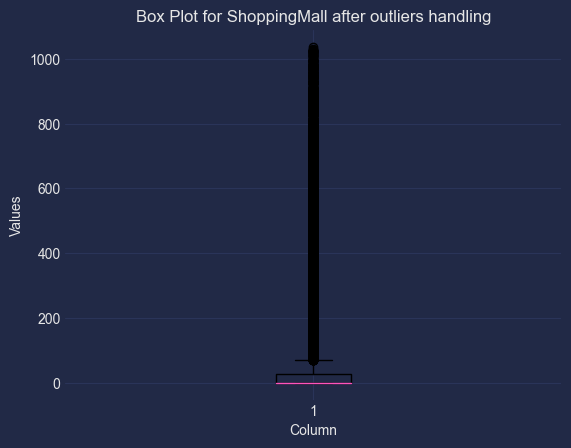

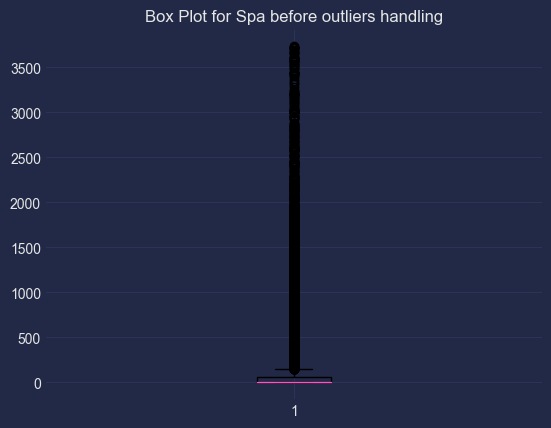

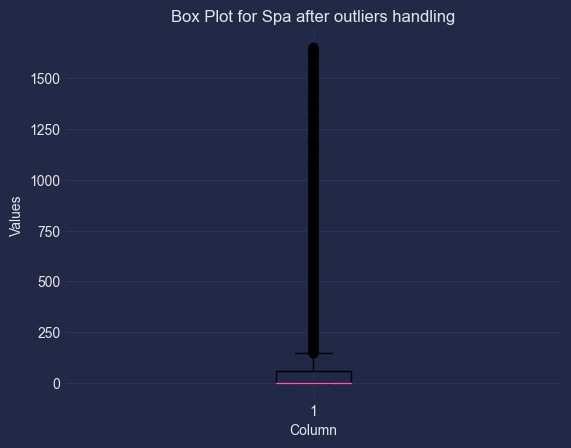

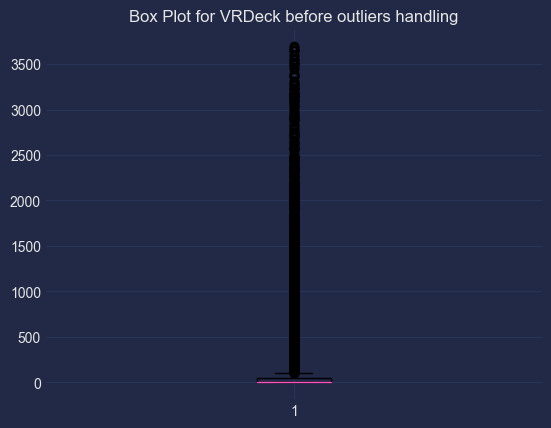

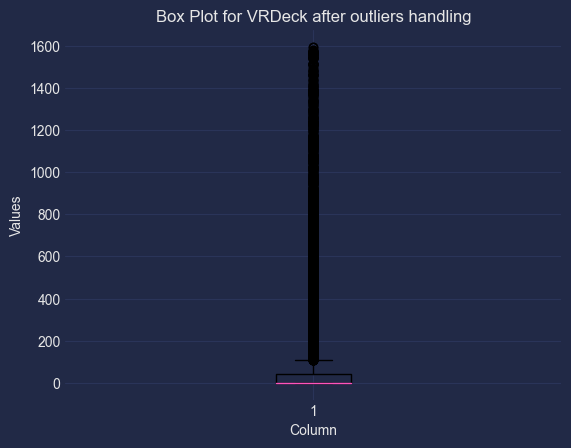

In [45]:
# Create box plots for each numeric column
for column in ['Age', 'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']:
    plt.figure()
    plt.boxplot(df[column])
    plt.title(f"Box Plot for {column} before outliers handling")
    plt.show()
    plt.boxplot(df2[column])
    plt.title(f"Box Plot for {column} after outliers handling")
    plt.xlabel("Column")
    plt.ylabel("Values")
    plt.show()

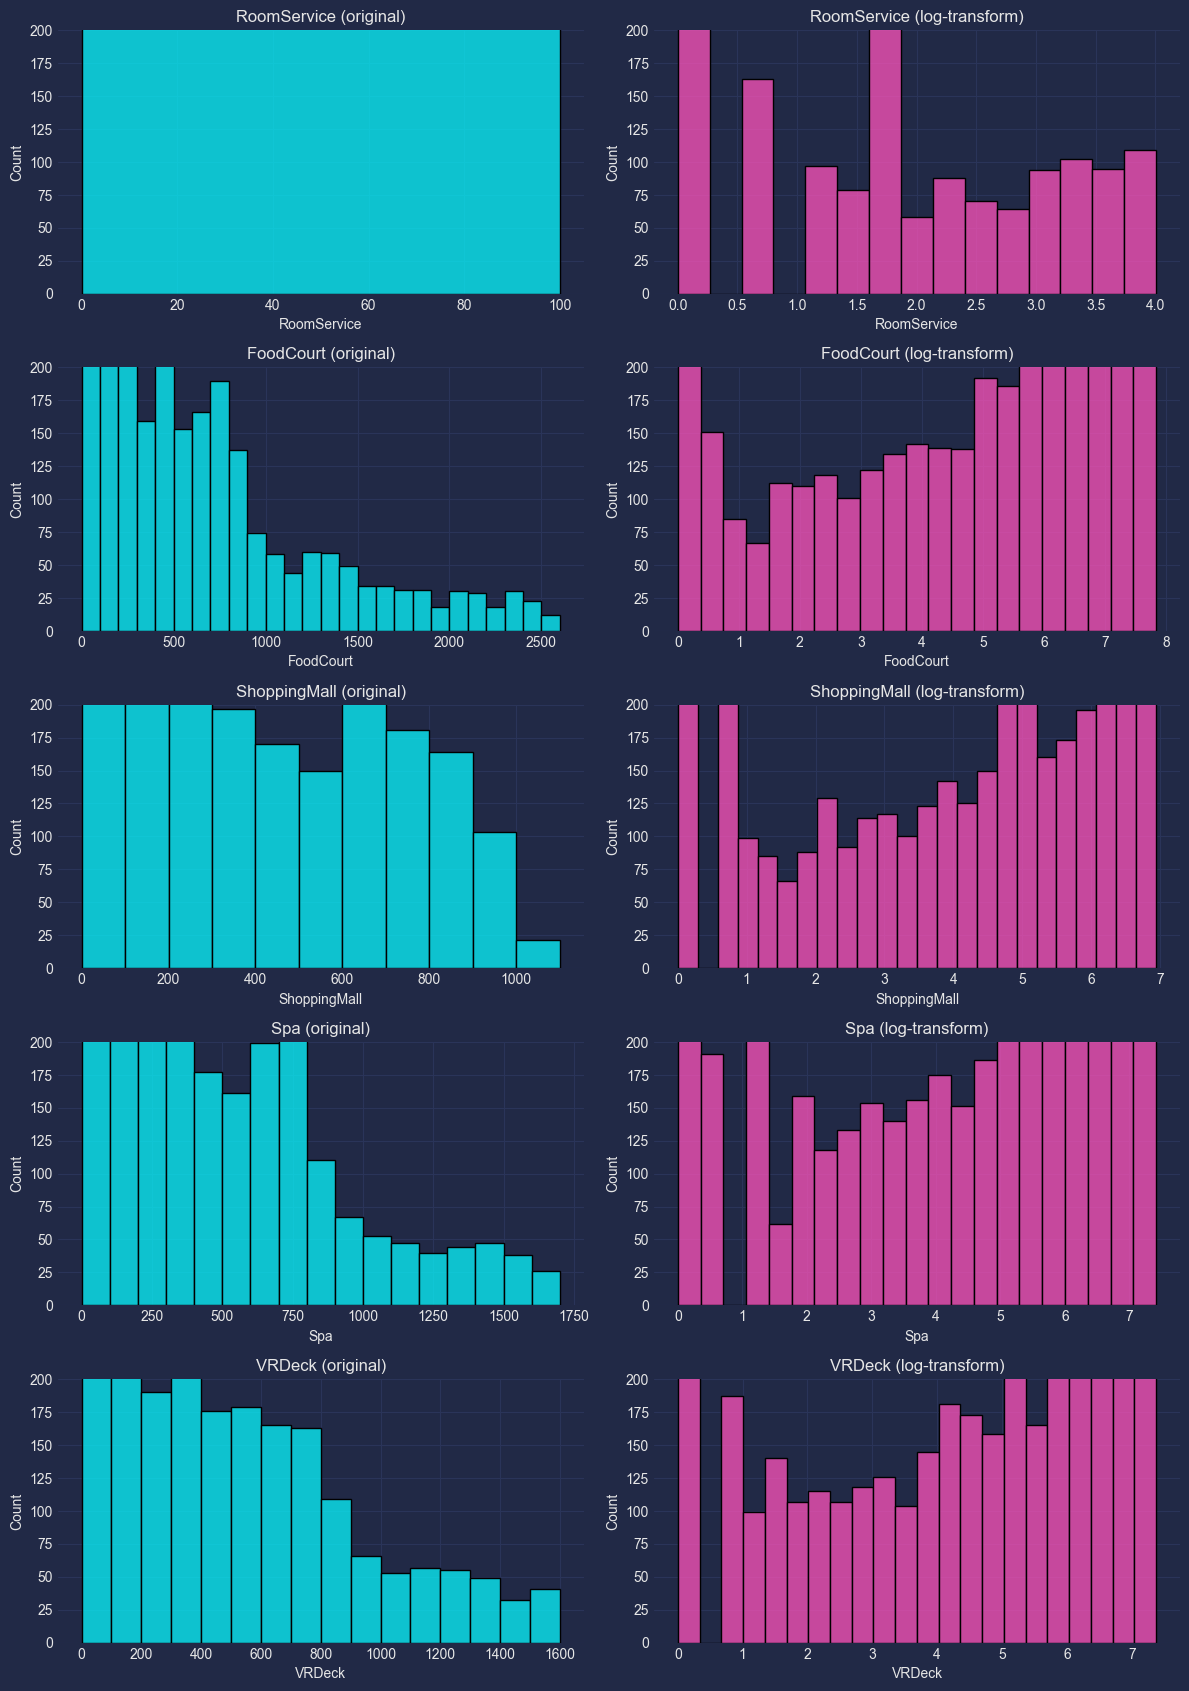

In [46]:
# Plot log transform results
fig=plt.figure(figsize=(12,20))
for i, col in enumerate(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']):
    plt.subplot(6,2,2*i+1)
    sns.histplot(df2[col], binwidth=100)
    plt.ylim([0,200])
    plt.title(f'{col} (original)')
    
    plt.subplot(6,2,2*i+2)
    sns.histplot(np.log(1+df2[col]), color='C1')
    plt.ylim([0,200])
    plt.title(f'{col} (log-transform)')
    
fig.tight_layout()
plt.show()

## Step 4: Check for Normality

Perform a normality check on the numerical features to assess if they follow a Gaussian distribution.
Use techniques like histograms, Q-Q plots, or statistical tests (e.g., Shapiro-Wilk test) to check for normality.

If the data is not normally distributed, consider applying appropriate transformations.

In [47]:
# Perform normality tests for each numeric column
for column in numerical_data:
    data = df2[column].dropna()

    # Shapiro-Wilk test
    shapiro_stat, shapiro_pvalue = stats.shapiro(data)
    shapiro_normal = shapiro_pvalue > 0.05

    # Anderson-Darling test
    anderson_stat, anderson_crit, anderson_sign = stats.anderson(data)
    anderson_normal = anderson_stat < anderson_crit[anderson_sign == 15][0]

    # D'Agostino's K^2 test
    dagostino_stat, dagostino_pvalue = stats.normaltest(data)
    dagostino_normal = dagostino_pvalue > 0.05

    # Jarque-Bera test
    jarquebera_stat, jarquebera_pvalue = stats.jarque_bera(data)
    jarquebera_normal = jarquebera_pvalue > 0.05

    print(f"Column: {column}")
    print(f"Shapiro-Wilk test - Normal: {shapiro_normal}")
    print(f"Anderson-Darling test - Normal: {anderson_normal}")
    print(f"D'Agostino's K^2 test - Normal: {dagostino_normal}")
    print(f"Jarque-Bera test - Normal: {jarquebera_normal}")
    print()

c:\Users\karakurt\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Column: HomePlanet
Shapiro-Wilk test - Normal: False
Anderson-Darling test - Normal: False
D'Agostino's K^2 test - Normal: False
Jarque-Bera test - Normal: False

Column: CryoSleep
Shapiro-Wilk test - Normal: False
Anderson-Darling test - Normal: False
D'Agostino's K^2 test - Normal: False
Jarque-Bera test - Normal: False

Column: Destination
Shapiro-Wilk test - Normal: False
Anderson-Darling test - Normal: False
D'Agostino's K^2 test - Normal: False
Jarque-Bera test - Normal: False

Column: Age
Shapiro-Wilk test - Normal: False
Anderson-Darling test - Normal: False
D'Agostino's K^2 test - Normal: False
Jarque-Bera test - Normal: False

Column: VIP
Shapiro-Wilk test - Normal: False
Anderson-Darling test - Normal: False
D'Agostino's K^2 test - Normal: False
Jarque-Bera test - Normal: False

Column: RoomService
Shapiro-Wilk test - Normal: False
Anderson-Darling test - Normal: False
D'Agostino's K^2 test - Normal: False
Jarque-Bera test - Normal: False

Column: FoodCourt
Shapiro-Wilk test

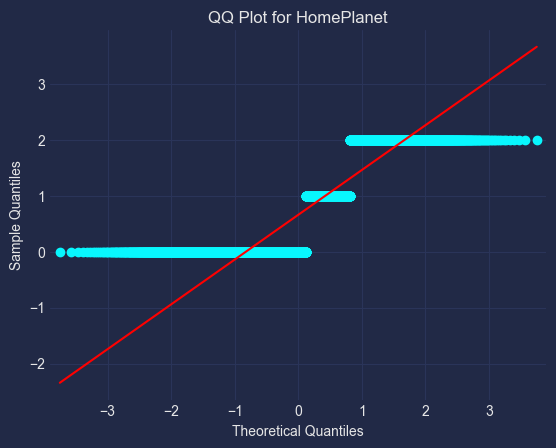

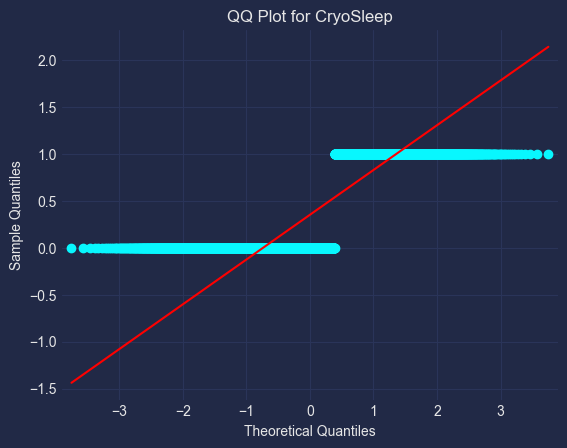

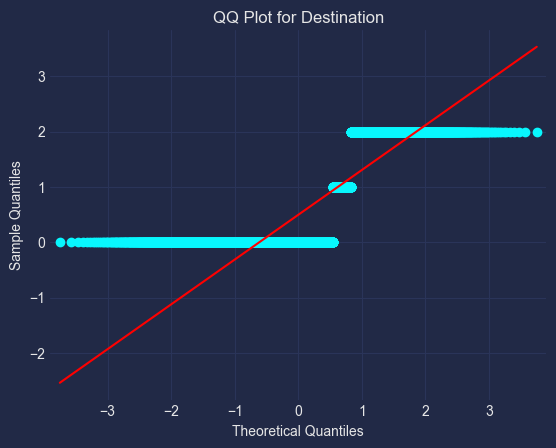

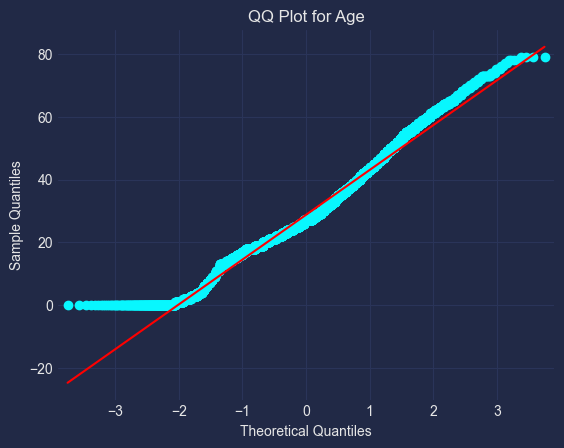

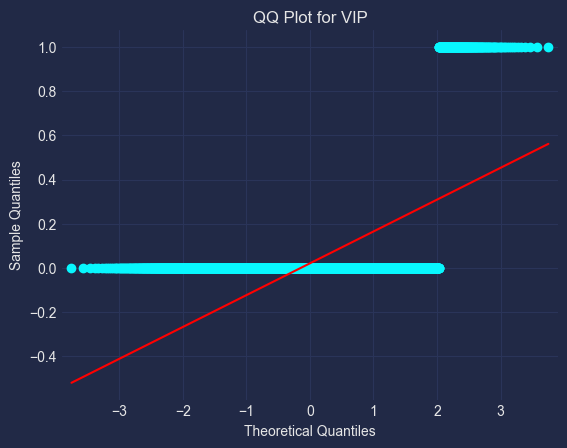

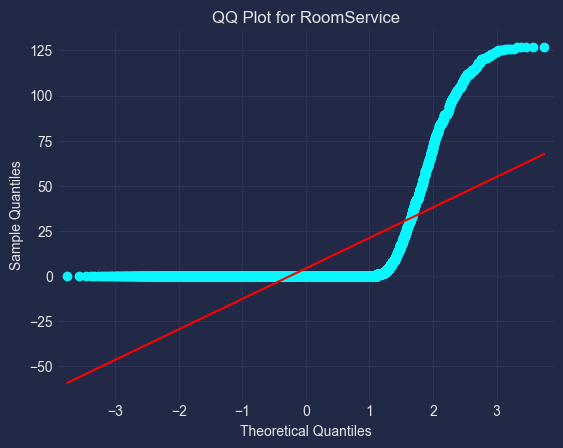

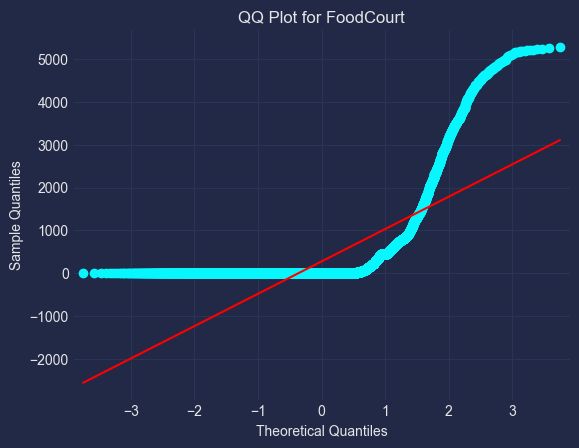

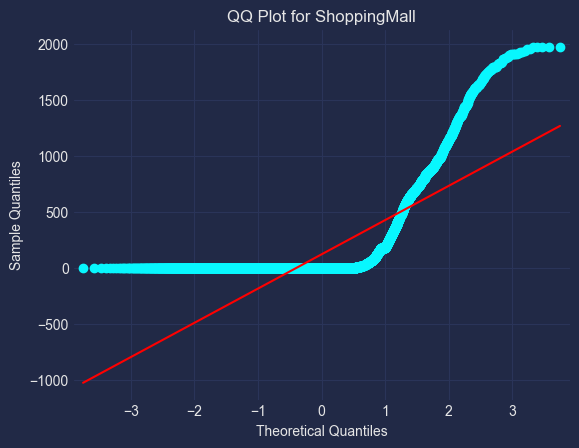

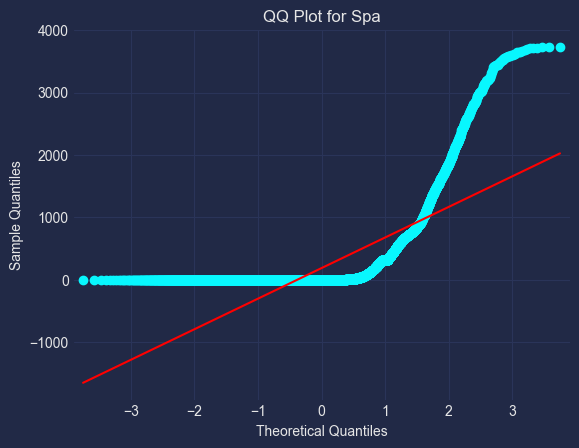

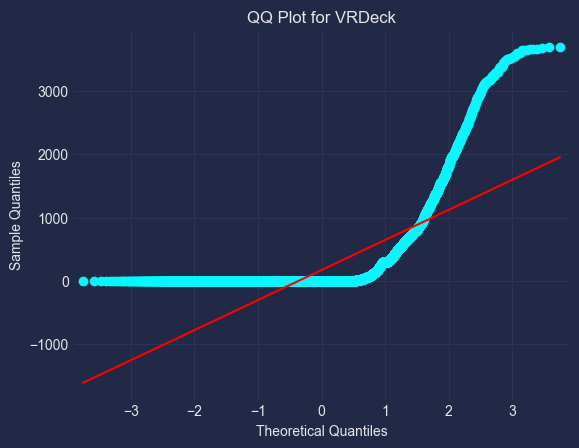

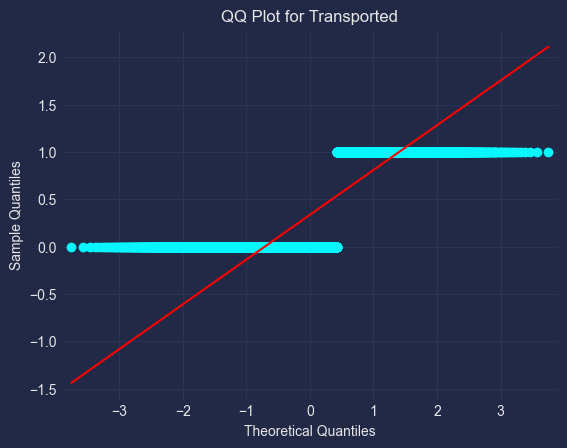

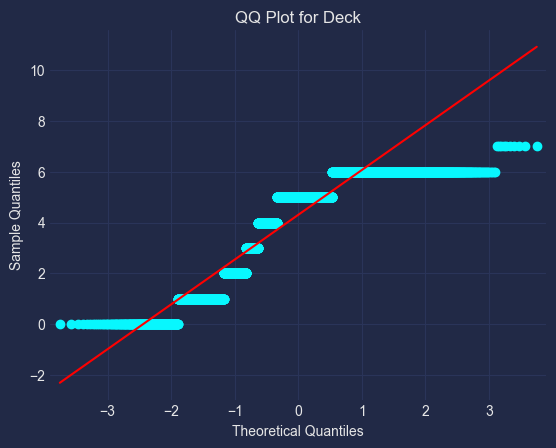

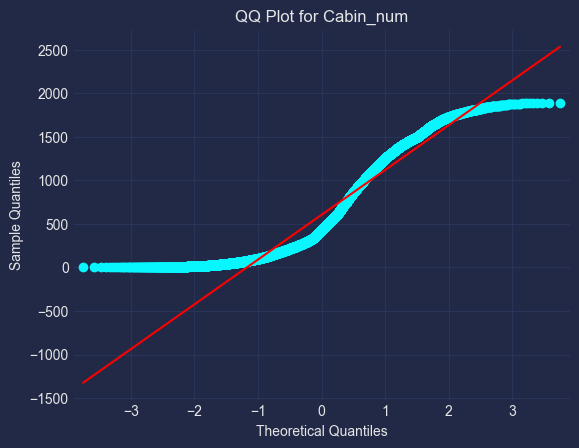

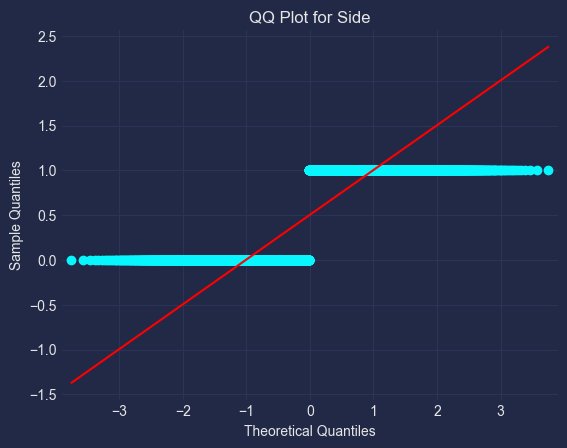

In [48]:
import statsmodels.api as sm
# Perform normality check using QQ plot
for column in numerical_data:
    # Create QQ plot
    sm.qqplot(df[column], line='s')
    plt.title(f"QQ Plot for {column}")
    plt.show()

Storing "RoomService","FoodCourt","ShoppingMall","Spa","VRDeck" Columns into subset_cols Variable

In [49]:
subset_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
subset_df = df[subset_cols]
#Importing StandardScaler Library
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#Fitting Data with StandardScaler
scaler.fit(subset_df)

StandardScaler()

Creating Dummy Variable for HomePlanet Column

In [50]:
dummy_home = pd.get_dummies(df["HomePlanet"],dtype=int)
home_df = pd.DataFrame(dummy_home)
df2 = pd.concat([df,home_df],axis="columns")
#Creating Dummy Variable for Destination Column
dummy_dest = pd.get_dummies(df["Destination"],dtype=int)
dest_df = pd.DataFrame(dummy_dest)
df3 = pd.concat([df2,dest_df],axis="columns")
#Dropping HomePlanet and Destination Column from DataFrame
df3.drop(["HomePlanet","Destination"],axis="columns",inplace=True)

## Step 5: Apply Transformations

Apply transformations to the data if required, based on the normality check results.

Common transformations include:

* Logarithmic transformation: Use when data is positively skewed.
* Square root transformation: Use when data has a moderate positive skew.
* Power transformation: Use when data has a severe positive or negative skew.

Apply the chosen transformation(s) to the appropriate features.

Transforming Data after fitting with StandardScaler

In [51]:
df3 = pd.concat([df2,dest_df],axis="columns")
scaled_values = scaler.transform(subset_df)
df[subset_cols] = scaled_values
#Dropping RoomService, FoodCourt, ShoppingMall, Spa, VRDeck Columns from DataFrame
df3.drop(["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"],axis="columns",inplace=True)
#Concatenating Scaled DataFrame and Orignal DataFrame
df4 = pd.concat([df3, df[subset_cols]],axis="columns")

In [52]:
df4.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Cabin_num,Side,0,1,2,0,1,2,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,0,0,39.0,0,0,1,0,0,0,1,0,1,0,0,-0.255747,-0.369547,-0.403940,-0.378357,-0.367689
1,0,0,0,24.0,0,1,5,0,1,1,0,0,1,0,0,6.198087,-0.357617,-0.322024,0.741442,-0.274899
2,1,0,0,58.0,1,0,0,0,1,0,1,0,1,0,0,2.290261,4.370685,-0.403940,0.259462,-0.264355
3,1,0,0,33.0,0,0,0,0,1,0,1,0,1,0,0,-0.255747,1.331157,0.811700,6.411823,0.039321
4,0,0,0,16.0,0,1,5,1,1,1,0,0,1,0,0,-0.255747,-0.276757,0.090835,0.774077,-0.363471


In [53]:
# Define the power value
power = 0.5

# Apply power transformation
transformed_data = np.power(df4['Age'], power)

In [54]:
def transformation_numerical(col): 
    # Select only the numeric columns
    numeric_data = df2 [numerical_data]
    # Perform logarithmic transformation on each numeric column
    log_transformed_df = np.log1p(numeric_data)
    sqrt_transformed_df = np.sqrt(numeric_data)
    power_transformed_df = np.power(numeric_data, 2)
    reciprocal_transformed_df = 1 / (numeric_data + 1)

    # Plot the original and transformed data for a single column
    column = col
    plt.figure(figsize=(10, 5))
    plt.subplot(2, 2, 1)
    plt.hist(numeric_data[column], bins=20)
    plt.title(f'{column} in Original Data')
    plt.subplot(2, 2, 2)
    plt.hist(log_transformed_df[column], bins=20)
    plt.title(f'{column} in Logarithmic Transformation')
    plt.subplot(2, 2, 3)
    plt.hist(sqrt_transformed_df[column], bins=20)
    plt.title(f'{column} in Square Root Transformation')
    plt.subplot(2, 2, 4)
    plt.hist(power_transformed_df[column], bins=20)
    plt.title(f'{column} in Power Transformation')
    plt.tight_layout()
    plt.show()

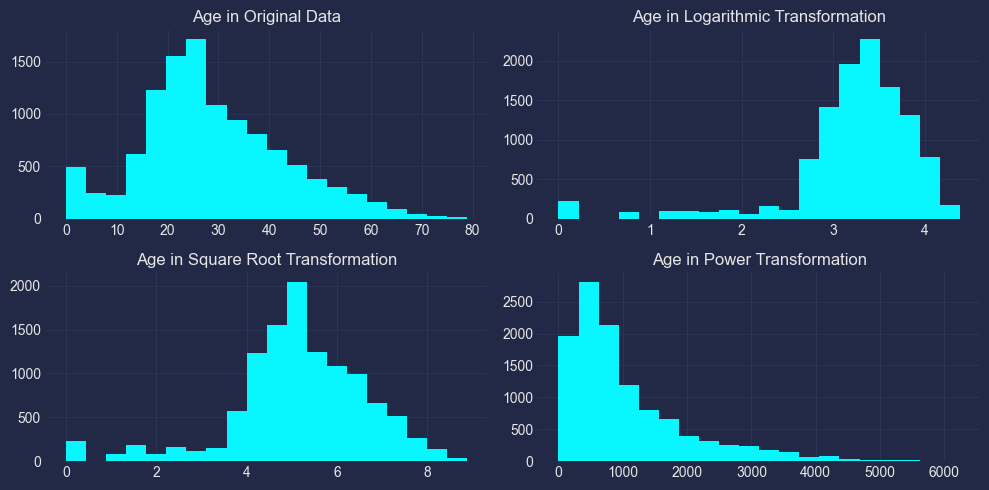

In [55]:
transformation_numerical('Age')

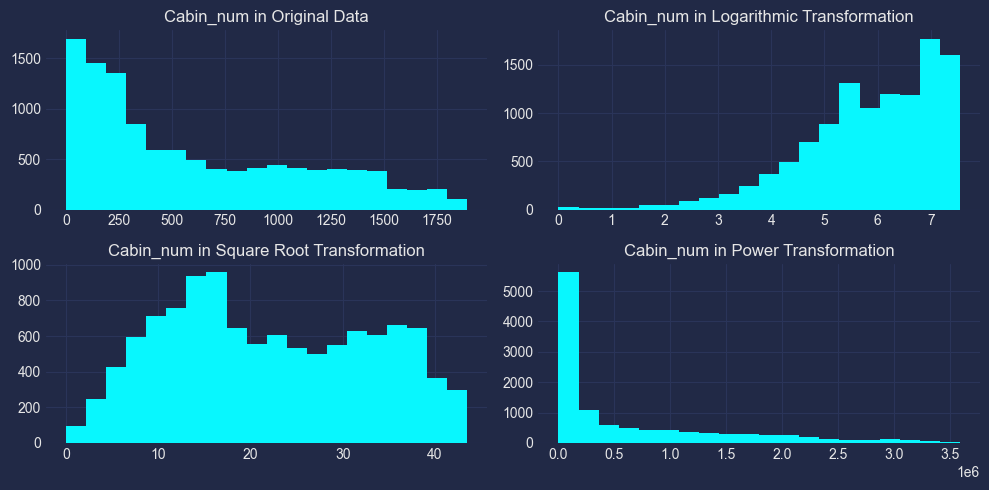

In [56]:
transformation_numerical('Cabin_num')

## Step 6: Split the Data

Split the preprocessed and transformed data into training and testing sets.
Typically, use around 70-80% of the data for training and the remaining for testing.

In [57]:
Y_full = df.pop('Transported')
X_full = df

In [58]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_full, test_size=0.3)

## Step 7: Select a Suitable Algorithm

Determine the appropriate algorithm(s) for this binary classification problem.
Consider algorithms like **Logistic Regression, Decision Trees, Random Forests, or Support Vector Machines.**
Choose an algorithm that suits the problem requirements and constraints.

In [60]:
from sklearn.neural_network import MLPClassifier

from xgboost import XGBClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


from sklearn.svm import SVC, LinearSVC, NuSVC

In [617]:
def normality_b_a_transformed(col):
    column = col
    numeric_data = df2 [numerical_data]
    log_transformed_df = np.log1p(numeric_data)
    sqrt_transformed_df = np.sqrt(numeric_data)
    power_transformed_df = np.power(numeric_data, 2)
    reciprocal_transformed_df = 1 / (numeric_data + 1)
    
    sm.qqplot(numeric_data[column], line='s')
    plt.title(f"QQ Plot for {column} in Original Data")
    plt.show()
    sm.qqplot(log_transformed_df[column], line='s')
    plt.title(f"QQ Plot for {column} in Logarithmic Transformed Data")
    plt.show()
    sm.qqplot(sqrt_transformed_df[column], line='s')
    plt.title(f"QQ Plot for {column} in Square Root Transformed Data")
    plt.show()
    sm.qqplot(power_transformed_df[column], line='s')
    plt.title(f"QQ Plot for {column} in Power Transformed Data")
    plt.show()

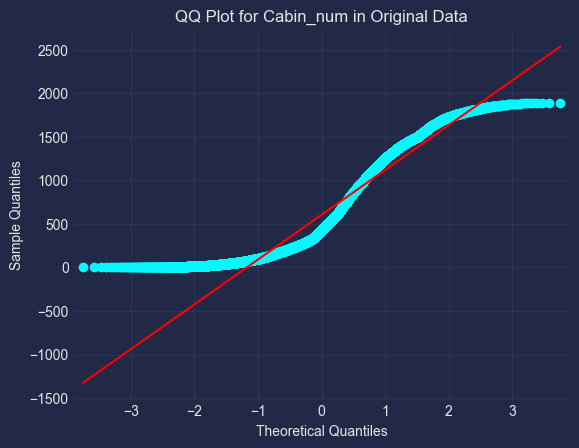

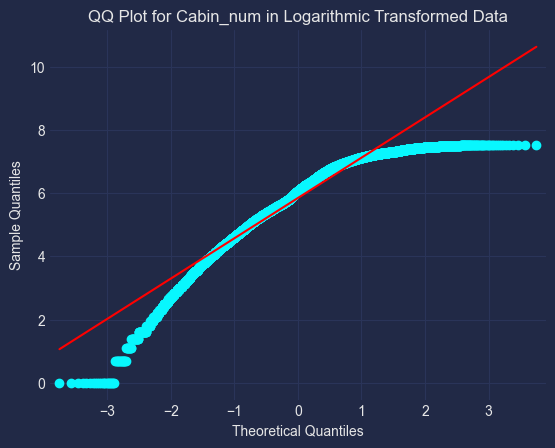

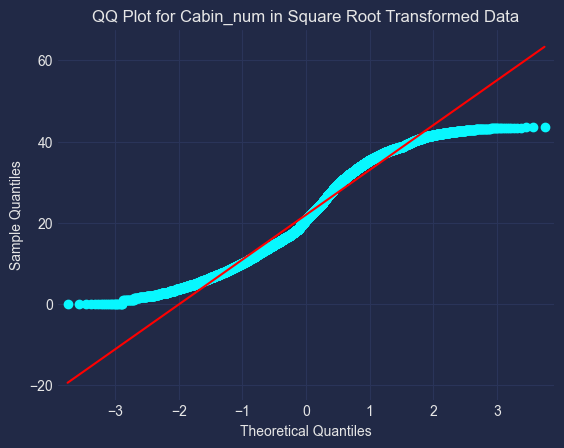

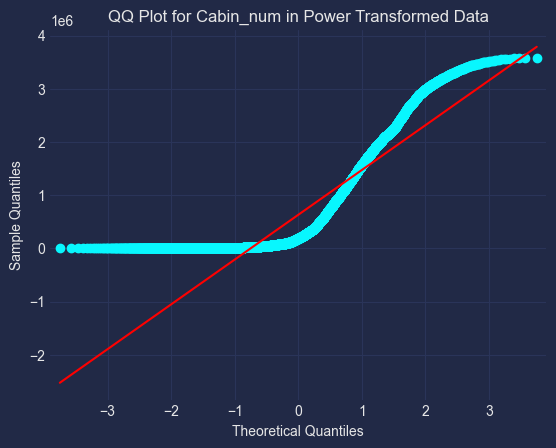

In [619]:
normality_b_a_transformed('Cabin_num')

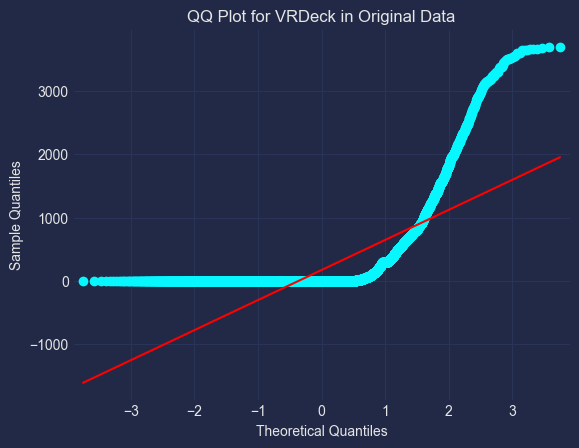

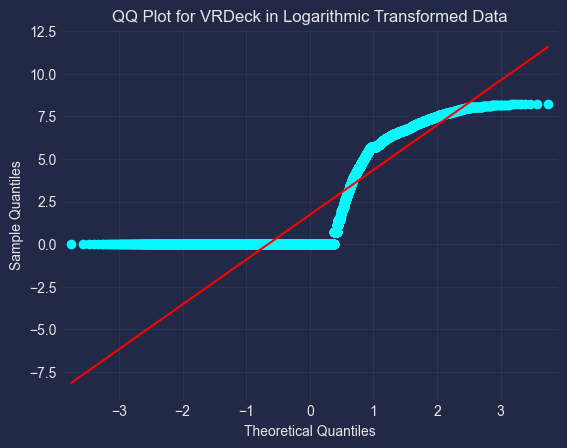

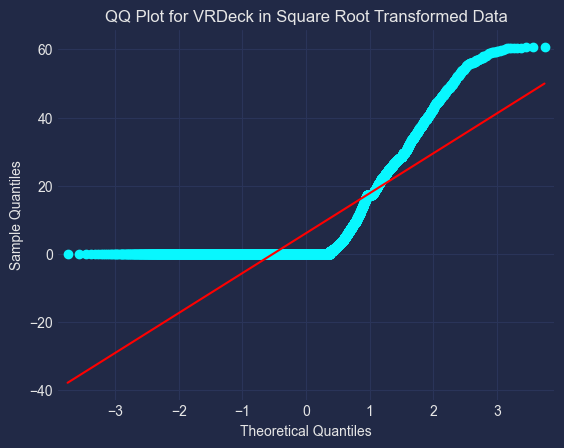

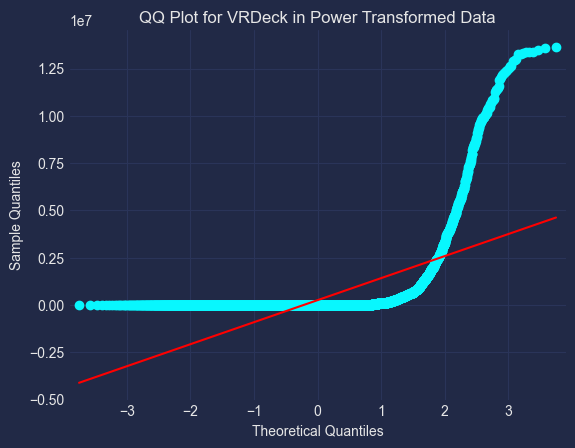

In [620]:
normality_b_a_transformed('VRDeck')

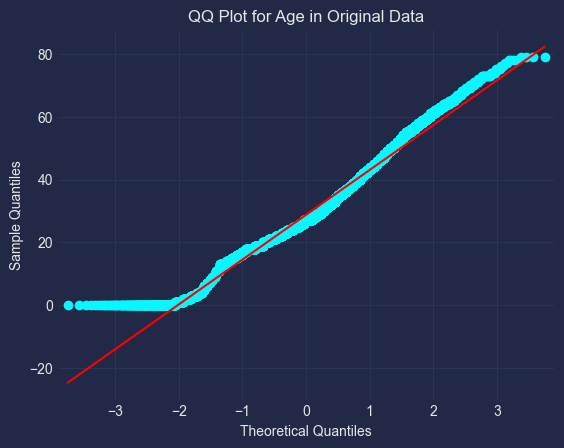

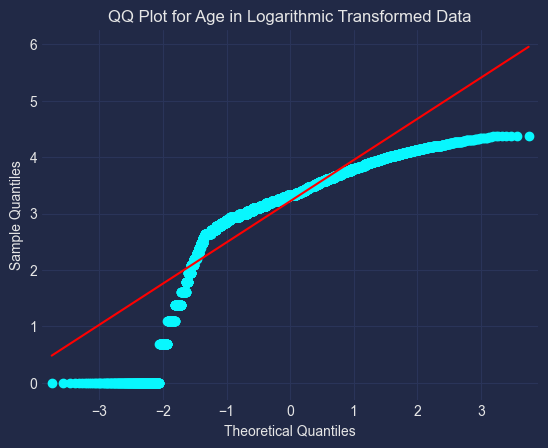

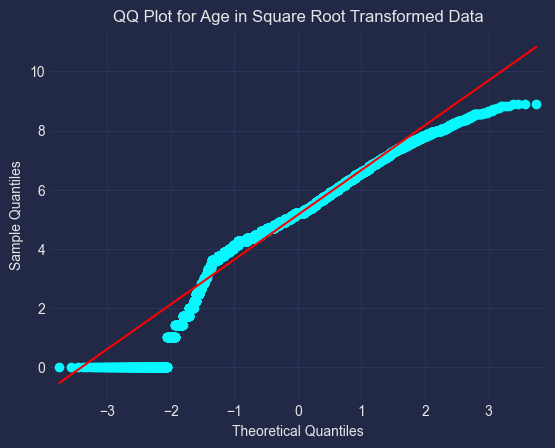

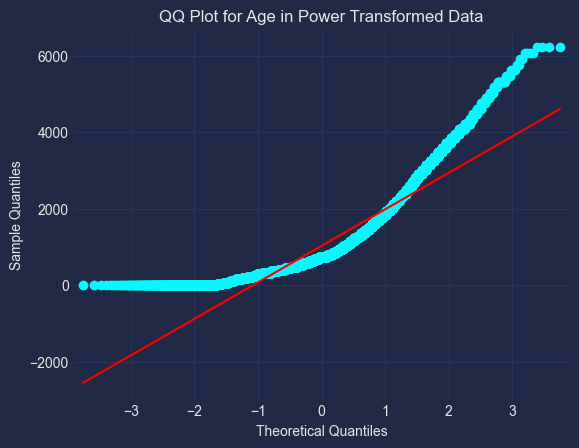

In [621]:
normality_b_a_transformed('Age')

In [118]:
from sklearn.linear_model import LogisticRegression
def lr_clf(C):
    model = LogisticRegression(C=C, random_state=0)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    return scores.mean()
print(lr_clf(C=0.1))

0.7025983499286049


In [108]:
from sklearn.svm import SVC
def svm_clf(C, gamma):
    model = SVC(C=C, gamma=gamma, random_state=0)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    return scores.mean()
print(svm_clf(C=0.1, gamma=0.001))

0.657211295114546


In [109]:
from sklearn.tree import DecisionTreeClassifier
def tree_clf(max_depth):
    model = DecisionTreeClassifier(max_depth=max_depth)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    return scores.mean()
print(tree_clf(max_depth=5))

0.7066327848192796


In [120]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=1000)
scores = cross_val_score(forest, X_train, y_train, cv=10)
print(scores.mean())

0.7128117247578782


In [111]:
from xgboost import XGBClassifier
def xgb_clf(n_estimators):
    model = XGBClassifier(n_estimators=n_estimators)
    scores = cross_val_score(model, X_train, y_train, cv=5,)
    return scores.mean()
print(xgb_clf(100))

0.708144515932176


I selected the RandomForestClassifier, because:

Strong Area:
Complex Non-linear classification
Continuous values (in case of regression trees)

Core idea:
Ensemble Learning
Bagging (parallel)
Weak learner and Strong learner

## Step 8: Train the Model

Train the selected algorithm on the training dataset.
Adjust hyperparameters if necessary to optimize model performance.
Evaluate the model's performance using suitable metrics (accuracy, precision, recall, etc.).

In [121]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [122]:
rf_model

RandomForestClassifier()

In [123]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7205882352941176

Model Tunning

In [124]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [125]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 3, #cv = 10
                           n_jobs = -1, 
                           verbose = 2) 

In [126]:
rf_cv_model.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [127]:
print("Best parametrers: " + str(rf_cv_model.best_params_))

Best parametrers: {'max_depth': 10, 'max_features': 5, 'min_samples_split': 10, 'n_estimators': 500}


# Step 9: Validate the Model

Use the testing dataset to validate the model's performance.
Calculate the same metrics as in step 8 to assess the model's accuracy and generalization ability.
Identify any issues like overfitting or underfitting.

In [128]:
rf_tuned = RandomForestClassifier(max_depth = 5, 
                                  max_features = 8, 
                                  min_samples_split = 10,
                                  n_estimators = 10)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=8, min_samples_split=10,
                       n_estimators=10)

## Step 10: Fine-tune and Optimize the Model

If needed, fine-tune the model by adjusting hyperparameters or trying different algorithms.
Employ techniques like cross-validation or grid search to find the best hyperparameters.
Iterate this process until you achieve satisfactory performance.

In [214]:
rf_params = {"max_depth": [5,8,20],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,13]}

In [215]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 3, #cv = 10
                           n_jobs = -1, 
                           verbose = 2) 

In [216]:
rf_cv_model.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 8, 20], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 13],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

## Step 11: Evaluate the Final Model

Evaluate the final model on the testing dataset once again.
Calculate relevant metrics to assess the model's accuracy, precision, recall, etc.
Interpret the model's predictions and document the results.

In [217]:
print("Best Parameters: " + str(rf_cv_model.best_params_))

Best Parameters: {'max_depth': 8, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 500}


In [218]:
rf_tuned = RandomForestClassifier(max_depth = 8, 
                                  max_features = 8, 
                                  min_samples_split =2,
                                  n_estimators = 500)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features=8, n_estimators=500)

In [219]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7441176470588236

In [229]:
#ı added this code block because of attribute error. "attributeerror: 'numpy.ndarray' object has no attribute 'columns'"
X_train = pd.DataFrame(X_train, columns =X_full.columns)
X_test = pd.DataFrame(X_test, columns=X_full.columns)

## Step 12: Communicate the Findings

Prepare a report or presentation summarizing the project's objectives, methodology, and results.
Clearly communicate the insights gained from the model, such as the importance of different features in predicting survival.
Provide recommendations or potential applications based on the findings.

In [224]:
import statsmodels.formula.api as smf
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Variable Severity Levels')

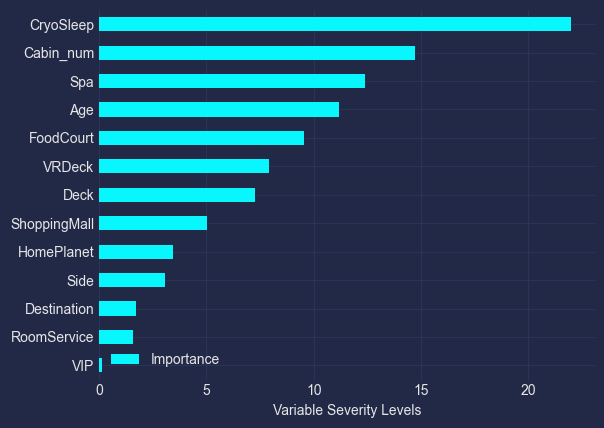

In [228]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh")

plt.xlabel("Variable Severity Levels")

## Step 13: Reflect and Learn

Reflect on the entire process and discuss the strengths and limitations of the project.
Identify areas for improvement and suggest future work or possible enhancements.
Share any lessons learned from the project to inform future endeavors.
Remember, adapt this guide based on the specific requirements and learning goals of your charity data bootcamp organization.